<a href="https://colab.research.google.com/github/saritmaitra/GARCH-Processes-Monte-Carlo-Simulations/blob/main/GARCH_Processes_%26_Monte_Carlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crude_Oil.csv to Crude_Oil.csv


In [3]:
df = pd.read_csv('Crude_Oil.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,4-Jan-00,25.55,25.20,25.69,24.71,74.79K,-0.20%
1,5-Jan-00,24.91,25.50,25.61,24.87,70.94K,-2.50%
2,6-Jan-00,24.78,24.80,25.34,24.51,85.25K,-0.52%
3,7-Jan-00,24.22,24.65,25.00,24.15,91.83K,-2.26%
4,10-Jan-00,24.67,24.22,24.75,24.02,68.90K,1.86%


## Data Analysis
In this section, we will look at the data from four perspectives:

- Summary Statistics.
- Line Plot.
- Density Plots.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4940 non-null   object 
 1   Price     4940 non-null   float64
 2   Open      4940 non-null   float64
 3   High      4940 non-null   float64
 4   Low       4940 non-null   float64
 5   Vol.      4940 non-null   object 
 6   Change %  4940 non-null   object 
dtypes: float64(4), object(3)
memory usage: 270.3+ KB


In [5]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

## Summary statistics
Some observations from these statistics include:

The number of observations (count) matches our expectation, meaning we are handling the data correctly.
The mean is about 62, which we might consider our level in this series.
The standard deviation (average spread from the mean) is relatively low (26).
The percentiles along with the standard deviation do suggest a large spread to the data.

In [6]:
df.describe()

,Price,Open,High,Low
count,4940.000000,4940.000000,4940.000000,4940.000000
mean,62.081427,62.079739,62.978844,61.118419
std,26.486885,26.489889,26.741406,26.189768
min,17.450000,17.300000,18.250000,16.700000
25%,40.060000,40.202500,41.192500,39.380000
50%,59.360000,59.395000,60.085000,58.410000
75%,83.760000,83.752500,84.852500,82.262500
max,145.290000,145.190000,147.270000,143.220000


The spread in this series will likely make highly accurate predictions difficult if it is caused by random fluctuation (e.g. not systematic).

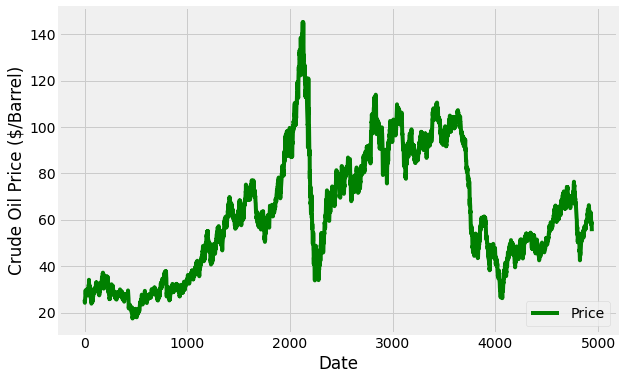

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

# Visualization

df['Price'].plot(figsize=(10,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Crude Oil Price ($/Barrel)')
plt.show()

In the past decades, the oil price has displayed large fluctuation which is in an unstable state, particularly around the year 2008 when U.S. financial crisis hits making the oil price increase to its highest point in history. With multiple cliff-like increases and declines, the oil price remained at a relative low level.

The mean of daily oil returns is substantially around the zerolevel horizonwith apparent volatility clustering, indicating the presence of heteroscedasticity (Daily Return price). Both positive and negative returns with large amplitude fluctuation increase the difficulty of risk investment and management.

The calculation of the daily % change is based on the following formula: 
rt= pt/pt−1−1, where p is the price, t is the time (a day in this case) and r is the return.

---



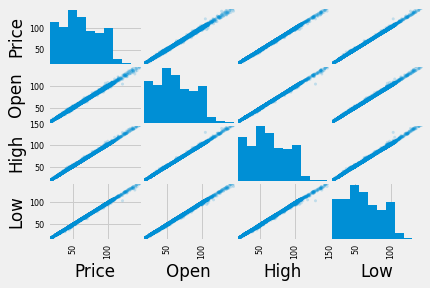

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2)
plt.show()

In [9]:
df['Returns'] = 100* df.Price.pct_change(1).fillna(0)  # 1 is for lokback period
df.Returns.head()

0    0.000000
1   -2.504892
2   -0.521879
3   -2.259887
4    1.857969
Name: Returns, dtype: float64

In [10]:
# Log returns - First the logarithm of the prices is taken 
df['returns'] = np.log(df.Price).diff(1).fillna(0)
df.returns.head()

0    0.000000
1   -0.025368
2   -0.005232
3   -0.022858
4    0.018409
Name: returns, dtype: float64

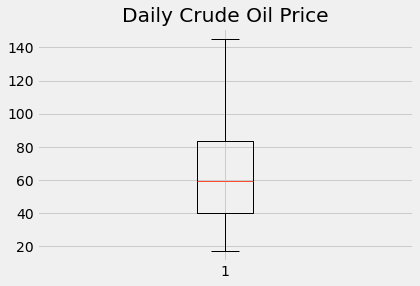

In [11]:
# Draw Plot

plt.boxplot(df.Price)
plt.title('Daily Crude Oil Price')
plt.show()

In [12]:
#df.log_returns.plot(figsize=(10,6),legend=True,linestyle='--',marker='o')
#plt.ylabel('Daily return (%)')
#plt.show()

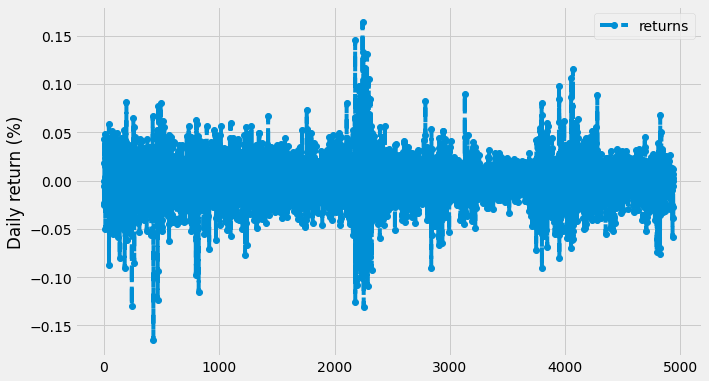

In [13]:
df.returns.plot(figsize=(10,6),legend=True,linestyle='--',marker='o')
plt.ylabel('Daily return (%)')
plt.show()

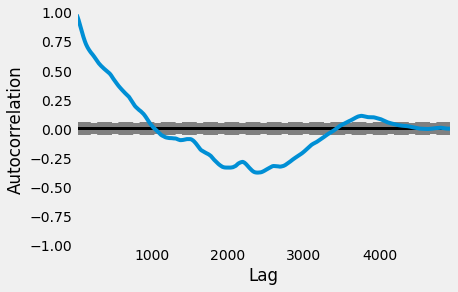

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Price)
plt.show()

In [15]:
# comparing log returns through visual display
#fig, ax = plt.subplots(2, sharex=True, figsize=(12,6))
#ax[0].plot(df.Price)
#ax[0].set_title("Raw data")
#ax[1].plot(df.log_returns)
#ax[1].set_title("Logged data (deflated)")


<Figure size 1080x432 with 0 Axes>

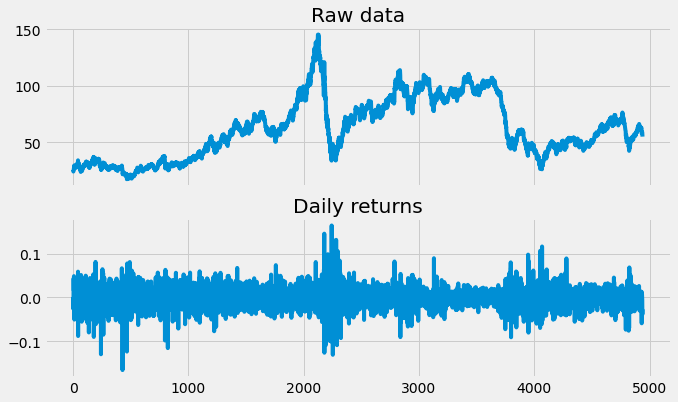

In [16]:
# comparing daily returns through visual display
plt.figure(figsize=(15,6))
#plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2, sharex=True, figsize=(10,6))
ax[0].plot(df.Price)
ax[0].set_title("Raw data")
ax[1].plot(df.returns)
ax[1].set_title("Daily returns")
plt.show()

In [17]:
import matplotlib.pyplot as plt
sns.set()
#sns.distplot(df.log_returns, color='blue') #density plot
#plt.title("2000-2019 Crude Oil return frequency")
#plt.xlabel('Possible range of data values')
#plt.show()

# Pull up summary statistics
#print(df.log_returns.describe())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


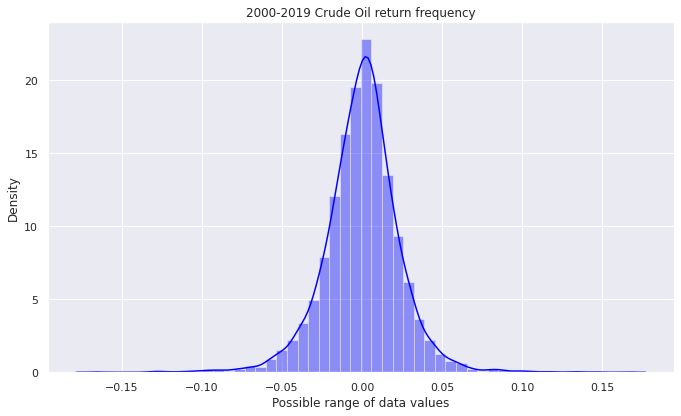

count    4940.000000
mean        0.000156
std         0.023541
min        -0.165445
25%        -0.012372
50%         0.000884
75%         0.012870
max         0.164097
Name: returns, dtype: float64


In [18]:
plt.figure(figsize=(10,6))
#plt.style.use('fivethirtyeight')
sns.distplot(df.returns, color='blue') #density plot
plt.title("2000-2019 Crude Oil return frequency")
plt.xlabel('Possible range of data values')
plt.show()

# Pull up summary statistics
print(df.returns.describe())

In [19]:
df.returns.skew(axis = 0) 

-0.119319617504601

In [20]:
from scipy.stats import kurtosis 
print( '\nKurtosis for retrun :', kurtosis(df.returns)) 
  
print( '\nKurtosis for return :',  
      kurtosis(df.returns, fisher = False)) 
  
print( '\nKurtosis for return :',  
      kurtosis(df.returns, fisher = True)) 


Kurtosis for retrun : 4.042674354649169

Kurtosis for return : 7.042674354649169

Kurtosis for return : 4.042674354649169


The distribution looks very symmetrical and normally distributed from distribution plot where the daily changes center around the bin 0.00. Though majority of the data points fall on the diagonal line, however, in the end, the plot shows the tendency to moving away from the line indicating volatility in the long run.

From the statistic, we see that the mean is very close to the 0.00; the standard deviation is 0.02. Also, looking at the percentiles we can estimate how many of our data points fall below -0.012299, 0.000887 and  0.012955.

Skewness measures the symmetry of the data about the mean. The skewness (0.095). 
The Kurtosis gives an indication of the shape of the distribution, as it compares the amount of data close to the mean with those far away from the mean (in the tails). The kurtosis (4.183) reflecting the leptokurtosis; though close range but reflects reasonable amount of volatility in Oil price on daily basis, as the skewness and kurtosis of the standard normal distribution are 0 and 3 respectively.

In [21]:
pip install scipy

<Figure size 720x432 with 0 Axes>

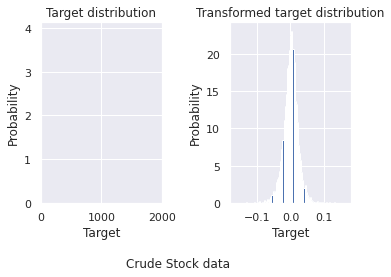

In [22]:
import matplotlib
from distutils.version import LooseVersion
from sklearn.datasets import make_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    
X, y = make_regression(n_samples=4940, noise=100, random_state=0)
y = np.exp((df.Price + abs(df.Price.min())) / 200)
y_trans = df.returns

from matplotlib import style
plt.figure(figsize=(10,6))

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(y, bins=100, **density_param)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability', fontsize=12)
ax0.set_xlabel('Target', fontsize=12)
ax0.set_title('Target distribution', fontsize =12)

ax1.hist(y_trans, bins=100, **density_param)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_xlabel('Target', fontsize=12)
ax1.set_title('Transformed target distribution', fontsize =12)

f.suptitle("Crude Stock data", y=0.035, fontsize=12)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [23]:
#df.returns.skew(axis = 0) 

In [24]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot

import seaborn as sns
#plt.figure(figsize=(10,6))
#plt.style.use('fivethirtyeight')
#qqplot(df.log_returns, line='r')
#plt.title('Crude Oil Daily Return', size = '12')
#plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
#plt.figure(figsize=(10,6))
#plt.style.use('fivethirtyeight')
#qqplot(df.Price, line='r')
#plt.title('Crude Oil', size = '12')
#plt.show()

In [26]:
#from statsmodels.graphics.gofplots import qqplot

#plt.figure(figsize=(10,6))
#plt.style.use('fivethirtyeight')
#qqplot(df.returns, line='r')
#plt.title('Crude Oil Daily Return', size = '12')
#plt.show()

In [27]:
from scipy import stats
#stats.jarque_bera(df.log_returns)

In [28]:
from scipy import stats
stats.jarque_bera(df.returns)

(3375.693433302615, 0.0)

Furthermore, the value of Jarque-Bera test shows that the traditional normal distribution assumption is suitable for the real distribution of Crude Oil daily returns.

 - The H0 for the test is that the data is normally distributed;
 - The H1 is that the data does not come from a normal distribution.

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. We have calculated the cumulative daily rate of return by using the daily % change values, adding 1 to them and calculating the cumulative product with the resulting value.

### White Noise and Random Walks
White noise is the first Time Series Model (TSM) we need to understand. By definition a time series that is a white noise process has serially UNcorrelated errors and the expected mean of those errors is equal to zero. Another description for serially uncorrelated errors is, independent and identically distributed (iid.). This is important because, if our TSM is appropriate and successful at capturing the underlying process, the residuals of our model will be iid. and resemble a white noise process. Therefore part of TSA is literally trying to fit a model to the time series such that the residual series is indistinguishable from white noise.

In [29]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib as mpl


In [30]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(df.Price)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Crude Oil Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

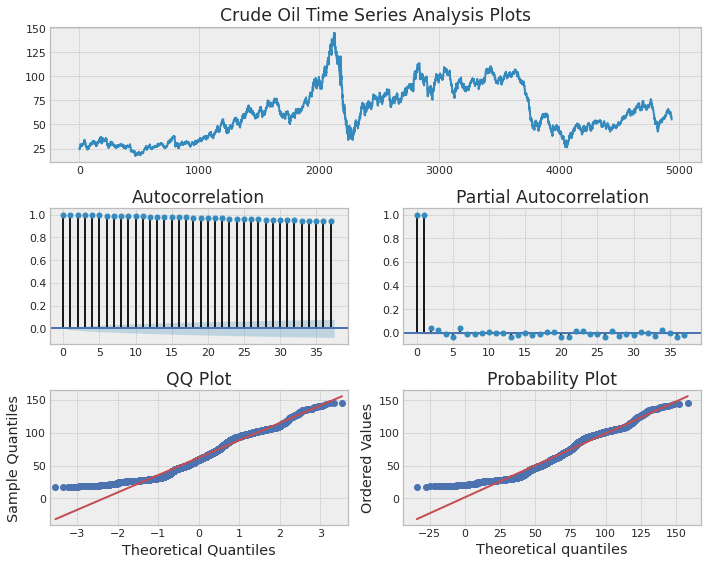

In [31]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser)

We can see a clear evidence of significant serial autocorrelation in the original data. Keep in mind we should see approximately 5% significance in the autocorrelation plots due to pure chance as a result of sampling from the Normal distribution. Below that we can see the QQ and Probability Plots, which compares the distribution of our data with another theoretical distribution. The shape of the QQ and Probability plots indicate that the process is close to normality but with 'heavy tails'. 

Moreover, our TS is not stationary. Let's find out if the random walk model is a good fit for our data. Recall that a random walk is x (t) = x(t-1) + w(t). Using algebra we can say that x(t) - x(t-1) = w(t).

In [32]:
# Calculate the cumulative daily returns
#df['cum_daily_return'] = (1 + returns).cumprod().fillna(0)

# Print `cum_daily_return`
#df.cum_daily_return.head(15)

In [33]:
#qqplot(df.cum_daily_return, line='r')
#plt.title('Crude Oil Daily Return', size = '12')
#plt.show()

In [34]:
#sns.distplot(df.cum_daily_return, color='blue') #density plot
#plt.title("2000-2019 Crude Oil cumulative return frequency")
#plt.xlabel('Possible range of data values')
#plt.show()

# Pull up summary statistics
#print(df.cum_daily_return.describe())

## Quantitative Volatility Analysis
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time.
The volatility is calculated by taking a rolling window standard deviation on the percentage change. Note that the size of the window can and will change the overall result: if you take the window wider and make min_periods larger, your result will become less representative. If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

Considering all of this, you see that it’s definitely a skill to get the right window size based upon the data sampling frequency.

In [35]:
# Define the minumum of periods to consider 
#min_periods = 75 

# Calculate the volatility
#vol = df.log_returns.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
#vol.plot(figsize=(10, 6))

# Show the plot
#plt.show()

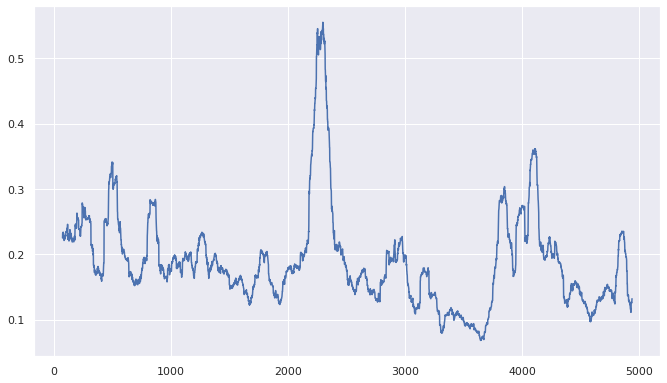

In [36]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = df.returns.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 6))

# Show the plot
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller  # stationary test
#print(" > Is the Daily Return stationary ?")
#dftest = adfuller(df.log_returns, autolag='AIC')
#print("Test statistic = {:.3f}".format(dftest[0]))
#print("P-value = {:.3f}".format(dftest[1]))
#print("Critical values :")
#for k, v in dftest[4].items():
    #print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    #print('*'*60)

In [39]:
pip install arch

     |████████████████████████████████| 798kB 4.9MB/s 


In [40]:
from arch.unitroot import ADF

ADF = ADF(df.returns)
print(ADF.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -30.185
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [41]:
#adf = ADF(df.returns)
#print(adf.summary().as_text())

In [42]:
adf.trend = 'ct'  # ct= constant & time trend
print(adf.summary().as_text())

NameError: ignored

In [43]:
reg_res = ADF.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     893.5
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:47:28   Log-Likelihood:                 11512.
No. Observations:                4934   AIC:                        -2.301e+04
Df Residuals:                    4927   BIC:                        -2.296e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -1.0911      0.036    -30.185      0.0

In [ ]:
#resids = pd.DataFrame(reg_res.resid)
#resids.index = df.log_returns.index[6:]
#resids.columns = ['resids']
#fig = resids.plot()

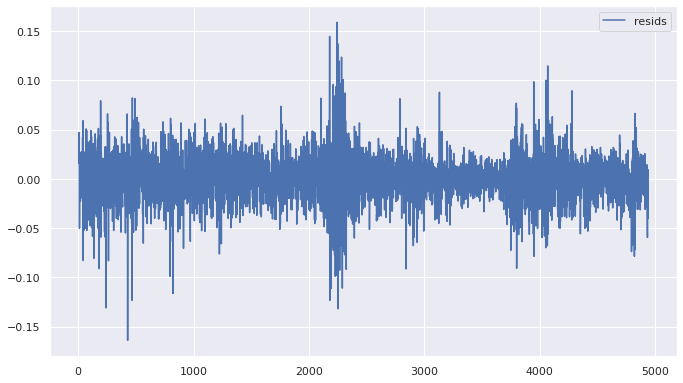

In [44]:
resids = pd.DataFrame(reg_res.resid)
resids.index = df.returns.index[6:]
resids.columns = ['resids']
fig = resids.plot(figsize=(10, 6))

Since the number lags was automatically set, it is good to check whether the residuals appear to be white noise.

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
#acf = pd.DataFrame(sm.tsa.stattools.acf(df.log_returns), columns=['ACF(CrudeOil)'])
#fig = acf[1:].plot(kind='bar', title='Autocorrelations', figsize=(10, 6))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


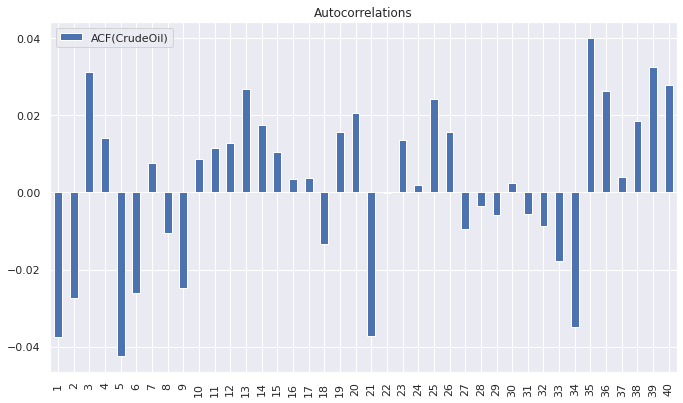

In [46]:
acf = pd.DataFrame(sm.tsa.stattools.acf(df.returns), columns=['ACF(CrudeOil)'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations', figsize=(10, 6))

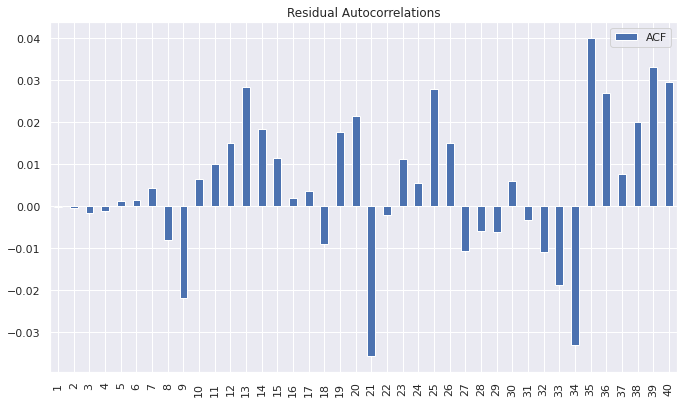

In [47]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid, fft= True), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Residual Autocorrelations', figsize=(10, 6))

### KPSS Testing
The KPSS test differs from the three previous in that the null is a stationary process and the alternative is a unit root.
Note that here the null is rejected which indicates that the series might be a unit root.

The null hypothesis of the KPSS test is that the series is weakly stationary and the alternative is that it is non-stationary. If the p-value is above a critical size, then the null cannot be rejected that there and the series appears stationary.
The p-values and critical values were computed using an extensive simulation based on 100,000,000 replications using series with 2,000 observations.
- Kwiatkowski, D.; Phillips, P. C. B.; Schmidt, P.; Shin, Y. (1992). “Testing the null hypothesis of stationarity against the alternative of a unit root”. Journal of Econometrics 54 (1-3), 159-178

In [48]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.133
P-value                         0.445
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Changing the trend does not alter the conclusion.

In [49]:
kpss.trend = 'ct'
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.035
P-value                         0.804
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


/usr/local/lib/python3.6/dist-packages/arch/unitroot/unitroot.py:653: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition
Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

In [50]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')


<Figure size 720x432 with 0 Axes>

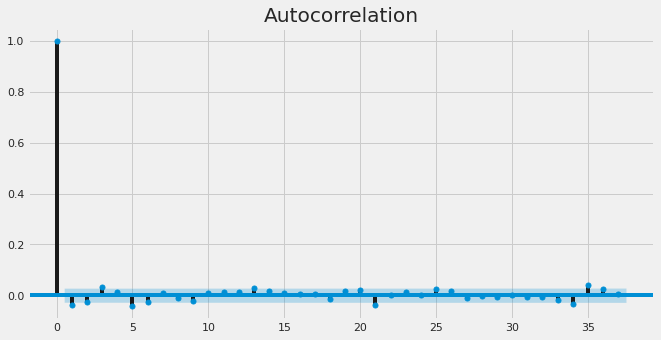

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = 10, 5
plot_acf(df.returns)
pyplot.show()

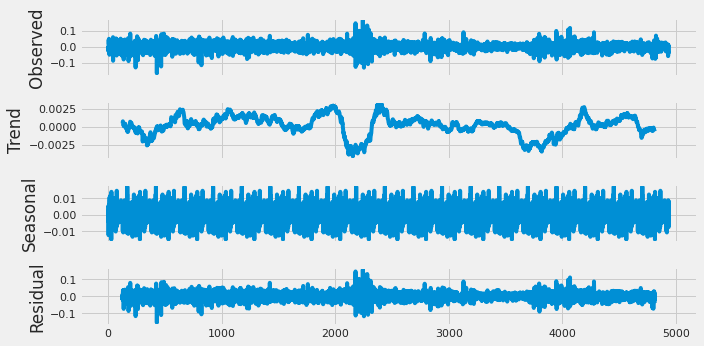

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(df.returns, model='additive', freq=252)
result.plot()
pyplot.show()

### Dickey-Fuller GLS Testing
The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. This test is only available with a constant or constant and time trend (trend='c' or trend='ct').
The results of this test agree with the ADF results.

In [53]:
from arch.unitroot import DFGLS
dfgls = DFGLS(df.returns)
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -30.181
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [54]:
dfgls.trend = 'ct'
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -28.487
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.41 (1%), -2.85 (5%), -2.56 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/arch/unitroot/unitroot.py:979: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


### Phillips-Perron Testing
The Phillips-Perron test is similar to the ADF except that the regression run does not include lagged values of the first differences. Instead, the PP test fixed the t-statistic using a long run variance estimation, implemented using a Newey-West covariance estimator.
By default, the number of lags is automatically set, although this can be overridden using lags.

The null hypothesis of the Phillips-Perron (PP) test is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then the null cannot be rejected that there and the series appears to be a unit root.
Unlike the ADF test, the regression estimated includes only one lag of the dependant variable, in addition to trend terms. Any serial correlation in the regression errors is accounted for using a long-run variance estimator (currently Newey-West).
The p-values are obtained through regression surface approximation from MacKinnon (1994) using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.
- Phillips, P. C. B., and P. Perron. 1988. “Testing for a unit root in time series regression”. Biometrika 75, 335-346.
- MacKinnon, J.G. 1994. “Approximate asymptotic distribution functions for unit-root and cointegration bootstrap”. Journal of Business and Economic Statistics. 12, 167-76.

In [55]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -72.940
P-value                         0.000
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


It is important that the number of lags is sufficient to pick up any dependence in the data.

In [56]:
pp.lags = 30
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -72.946
P-value                         0.000
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/arch/unitroot/unitroot.py:631: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


In [57]:
pp.trend = 'ct'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -72.955
P-value                         0.000
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/arch/unitroot/unitroot.py:653: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


In [58]:
pp.test_type = 'rho'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-rho)    
Test Statistic              -5105.174
P-value                         0.000
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%), -21.68 (5%), -18.23 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.6/dist-packages/arch/unitroot/unitroot.py:1202: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


### Zivot-Andrews Test
The Zivot-Andrews test allows the possibility of a single structural break in the series. Here we test the default using the test.

H0 = unit root with a single structural break
Algorithm follows Baum (2004/2015) approximation to original Zivot-Andrews method. Rather than performing an autolag regression at each candidate break period (as per the original paper), a single autolag regression is run up-front on the base model (constant + trend with no dummies) to determine the best lag length. This lag length is then used for all subsequent break-period regressions. This results in significant run time reduction but also slightly more pessimistic test statistics than the original Zivot-Andrews method,
No attempt has been made to characterize the size/power trade-off.
- Baum, C.F. (2004). ZANDREWS: Stata module to calculate Zivot-Andrews unit root test in presence of structural break,” Statistical Software Components S437301, Boston College Department of Economics, revised 2015.
- Zivot, E., and Andrews, D.W.K. (1992). Further evidence on the great crash, the oil-price shock, and the unit-root hypothesis. Journal of Business & Economic Studies, 10: 251-270.

In [59]:
from arch.unitroot import ZivotAndrews

za = ZivotAndrews(df.returns)
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                -30.290
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


### Variance Ratio Testing
Variance ratio tests are not usually used as unit root tests, and are instead used for testing whether a financial return series is a pure random walk versus having some predictability. 

The variance ratio compares the variance of a 1-period return to that of a multi-period return. We have compared 1-month to 12-month returns, and the null that the series is a pure random walk is rejected. Negative values indicate some positive autocorrelation in the returns (momentum).

The null hypothesis of a VR is that the process is a random walk, possibly plus drift. Rejection of the null with a positive test statistic indicates the presence of positive serial correlation in the time series.

In [60]:
from arch.unitroot import VarianceRatio
vr = VarianceRatio(df.returns, 12)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                -11.197
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)


In [61]:
# Add a constant 
C = sm.add_constant(df.returns)
# Construct the model
model = sm.OLS(df.returns,C).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.039e+35
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:47:43   Log-Likelihood:             1.8966e+05
No. Observations:                4940   AIC:                        -3.793e+05
Df Residuals:                    4938   BIC:                        -3.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.591e-19    7.3e-20     -4.917      0.0

## Heteroskedasticity Tests

In [62]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid,  model.model.exog)
print(white_test)

(4178.692435441434, 0.0, 13549.191886551474, 0.0)


What we get are two test statistics and two p-values (textbooks prefer the LM test, but the F test is widely used and basically equivalent). Heteroskedasticity is indicated if p <0.05, so according to these tests, this model is heteroskedastic.

### Getting Around the White Test’s Limitations
There are two modifications to the White test we can make to deal with situations where the heteroskedasticity is not linear and the standard White test is impractical. Unfortunately, there are no modules for doing so automatically in python, but it is possible to do so manually.

 - First add the squared residuals to your data frame
 - Find the residuals squared, the predictions and the predictions squared, and put them into a data frame.

In [63]:
from statsmodels.formula.api import ols
df['resid2'] = model.resid**2
predict = model.predict()
predict2 = predict**2

white_test = ols(formula='resid2~predict+predict2', data=df).fit()
white_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resid2   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.355e+04
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:47:43   Log-Likelihood:             3.8627e+05
No. Observations:                4940   AIC:                        -7.725e+05
Df Residuals:                    4937   BIC:                        -7.725e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.983e-37   4.09e-37      2.441      0.015    1.97e-37     1.8e-36
predict    -3.495e-35   1.61e-35     -2.170      0.030   -6.65e-35   -3.38e-36
predict2    4.575e-32   2.78e-34    164.355      0.000    4.52e-32    4.63e-32
==============================================================================
Omnibus:                     2975.133   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1924404.460
Skew:                           1.505   Prob(JB):                         0.00
Kurtosis:                      99.645   Cond. No.                         735.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F test 0.00 for both the cases indicate the data is not homoskedastic.

In [64]:
pip install hurst

The Hurst exponent, H, measures the long-term memory of a time series, characterising it as either mean-reverting, trending or a random walk. 

H is a number between 0 and 1, with 
- H < 0.5 indicating mean reversion, 
- H > 0.5 indicating a trending time series and 
- H = 0.5 indicating a random walk. 

Smaller and larger values of H indicate stronger mean-reversion and trending, respectively.

In [65]:
from numpy import *
from pylab import plot, show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


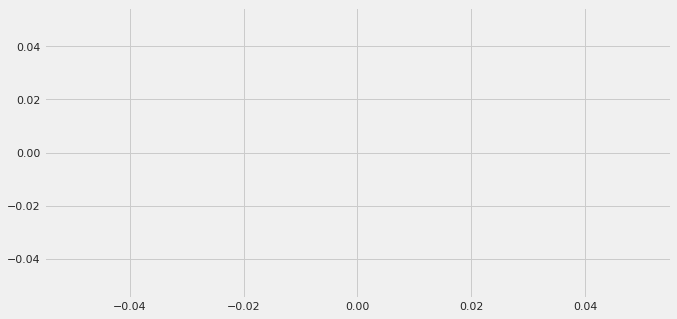

hurst =  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [66]:
# calculate Hurst
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(df.Price[lag:], df.Price[:-lag]))) for lag in lags]
plot(log(lags), log(tau)); show()
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print ('hurst = ',hurst)

When we calculate Hurst we get a value of roughly  0.5015, which tells us that our series random walk.

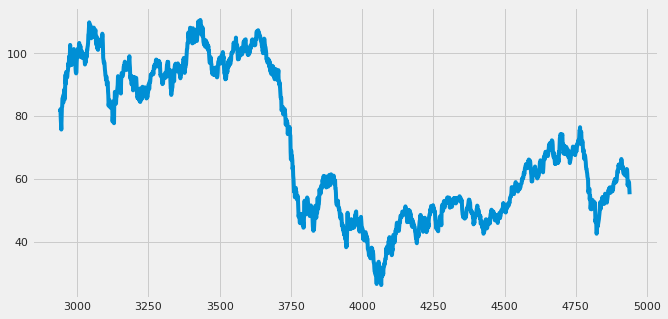

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


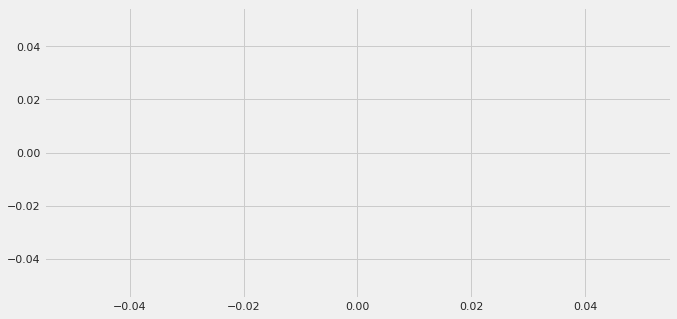

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


hurst =  nan


In [67]:
closes_recent = df.Price[-2000:]
plot(closes_recent); show()
# calculate Hurst of recent prices
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(closes_recent[lag:], closes_recent[:-lag]))) for lag in lags]
plot(log(lags), log(tau)); show()
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print ('hurst = ',hurst)

H=0.708, c=0.728


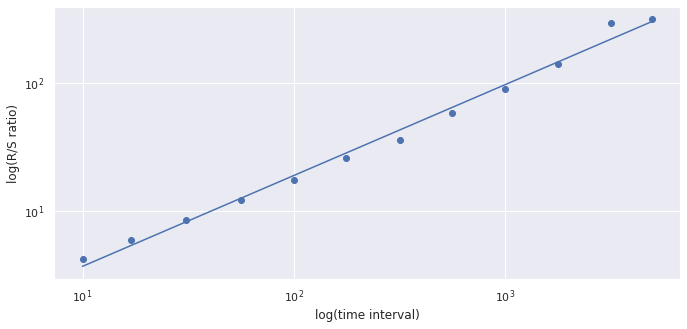

In [68]:
from hurst import compute_Hc, random_walk
import seaborn as sns
sns.set();
%matplotlib inline

np.random.seed(42)
random_changes = 1. + np.random.randn(4940) / 1000.
returns = np.cumprod(random_changes)  
H, c, result = compute_Hc(df.Price, kind='price', simplified=True)


plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


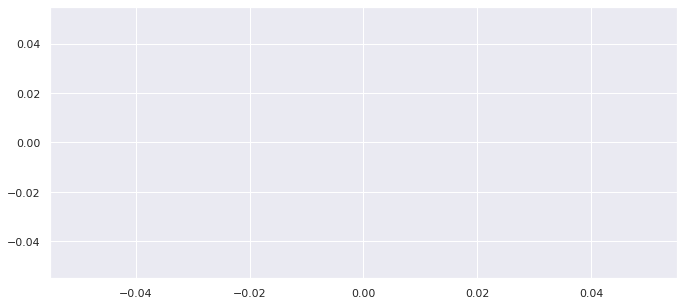

hurst =  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [69]:
from numpy import *
from pylab import plot, show
# first, create an arbitrary time series, ts

# calculate standard deviation of differenced series using various lags
lags = range(2, 20)
tau = [sqrt(std(subtract(df.returns[lag:], df.returns[:-lag]))) for lag in lags]
# plot on log-log scale
plot(log(lags), log(tau)); show()
# calculate Hurst as slope of log-log plot
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2.0
print ('hurst = ',hurst)

In [71]:
import math
from math import *


In [ ]:
from numpy import *
from pylab import plot, show
# first, create an arbitrary time series, ts
ts = [0]
for i in range(1,4940):
    ts.append(ts[i-1]*1.0 + random.randn())
# calculate Hurst
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(df.returns[lag:], df.returns[:-lag]))) for lag in lags]
# plot on log-log scale
plot(log(lags), log(tau)); show()
# calculate Hurst as slope of log-log plot
# Use a linear fit to estimate the Hurst Exponent
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2.0
print 'hurst = ',hurst

In [80]:
mu = 0.75
theta = 0.04
sigma = 0.05
for i in range(1,4940):
  dts  = (mu - df.returns[i-1])*theta + random.randn()*sigma
  df.returns[i] = df.returns[i-1] + dts
# calculate Hurst
lag1 = 2
lags = range(lag1, 20)
tau = [sqrt(std(subtract(df.returns[lag:], df.returns[:-lag]))) for lag in lags]
plot(log(lags), log(tau)); show()
# Use a linear fit to estimate the Hurst Exponent
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2
print ('hurst = ',hurst)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: ignored

In the plot above, the Hurst exponent is estimated to be around 0.53 which approximately corresponds to a random walk.

In [81]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from datetime import datetime
import time

In [ ]:
pip install PyRQA

In [ ]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.computing_type import ComputingType
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation

time_series = TimeSeries(df.Price,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

In [ ]:
pip install arch

In [ ]:
X = 100* df.returns

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing

X1_train,X1_test = train_test_split(X, test_size=0.05)
print('length of X1_train and X1_test: ', len(X1_train), len(X1_test))

It is always a good idea to scale return by 100 before estimating ARCH-type models. This helps the optimizer converse since the scale of the volatility intercept is much closer to the scale of the other parameters in the model.

In [ ]:
from statsmodels.tsa.ar_model import AR

# contrived dataset
data = X
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
#Y = df.returns

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# train autoregression
model = AR(X)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

In [ ]:
from sklearn import preprocessing

# Using feature in sklearn, preposessing to scale features
#X1 = preprocessing.scale(X1_train)

Now apply the procedure to a Crude Oil time series. Here we’re going to use daily returns. The process is as follows:
- Iterate through combinations of ARIMA(p, d, q) models to best fit our time series.
- Pick the GARCH model orders according to the ARIMA model with lowest AIC.
- Fit the GARCH(p, q) model to our time series.
- Examine the model residuals and squared residuals for autocorrelation

In [ ]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) # [0,1,2,3,4,5]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl
  
TS = X
res_tup = _get_best_model(TS)

#aic: 22462.01 | order: (2, 0, 2)

We find the best model is ARIMA(2,0,2). Now we plot the residuals to decide if they possess evidence of conditional heteroskedastic behaviour

In [ ]:
Order = res_tup[1]
Model = res_tup[2]

In [ ]:
tsplot(Model.resid)

We find the residuals look like white noise. Let’s look at the square of residuals

In [ ]:
tsplot(Model.resid**2, lags=30)

We can see clear evidence of autocorrelation in squared residuals. Let’s fit a GARCH model and see how it does.
### Generalized Autoregressive Conditionally Heteroskedastic Models — GARCH(p,q)
It is always a good idea to scale return by 100 before estimating ARCH-type models. This helps the optimizer converse since the scale of the volatility intercept is much closer to the scale of the other parameters in the model.

## Building a Model From Components
Models can also be systematically assembled from the three model components:
- A mean model (arch.mean)
    - Autoregressive (ARX) with optional exogenous regressors
- A volatility process (arch.volatility)
    - ARCH (ARCH)
    - GARCH (GARCH)
    - GJR-GARCH (GARCH using o argument)
    - TARCH/ZARCH (GARCH using power argument set to 1)
- A distribution (arch.distribution)
    - Normal (Normal)
    - Standardized Students’s T (StudentsT)

## Autoregressive


In [ ]:
pip install arch

In [ ]:
from arch.univariate import ARX

arx = ARX(X)
print(arx.fit().summary())

### Volatility Processes
Volatility processes can be added a a mean model using the volatility property. This example adds an ARCH(5) process to model volatility. The arguments iter and disp are used in fit() to suppress estimation output.

In [ ]:
from arch.univariate import ARCH, GARCH
arx.volatility = ARCH(p=5)
vres = arx.fit(update_freq=5, disp='off')
print(vres.summary())

In [ ]:
plt.rcParams['figure.figsize'] = 10, 5
fig = vres.plot()

Plotting the standardized residuals and the conditional volatility shows some large (in magnitude) errors, even when standardized.

### Distributions
Finally the distribution can be changed from the default normal to a standardized Student’s T using the distribution property of a mean model.

The Student’s t distribution improves the model, and the degree of freedom is estimated to be near 8.

In [ ]:
from arch.univariate import StudentsT

arx.distribution = StudentsT()
res = arx.fit(update_freq=5, disp='off')
print(res.summary())

We can see that the true parameters all fall within the respective 95% confidence intervals.

Three models are fit using alternative distributional assumptions. The results are printed, where we can see that the normal has a lower log-likelihood than either the Standard Student’s T or the Standardized Skew Student’s T – however, these three are fairly close. The closeness of the T and the Skew T indicate that returns are not heavily skewed.

In [ ]:
from arch import arch_model
from collections import OrderedDict

crude_ret = X
res_normal = arch_model(crude_ret).fit(disp='off')
res_t = arch_model(crude_ret, dist='t').fit(disp='off')
res_skewt = arch_model(crude_ret, dist='skewt').fit(disp='off')
lls = pd.Series(
    OrderedDict((('normal', res_normal.loglikelihood),
                 ('t', res_t.loglikelihood), ('skewt',
                                              res_skewt.loglikelihood))))
print(lls)
params = pd.DataFrame(
    OrderedDict((('normal', res_normal.params), ('t', res_t.params),
                 ('skewt', res_skewt.params))))
print(params)

Omega (w) is white noise, and alpha and beta are parameters of the model. Also alpha_1 + beta_1 must be less than 1 or the model is unstable. 

The standardized residuals can be computed by dividing the residuals by the conditional volatility. These are plotted along with the (unstandardized, but scaled) residuals. The non-standardized residuals are more peaked in the center indicating that the distribution is somewhat more heavy tailed than that of the standardized residuals.

In [ ]:
pip install arch

In [ ]:
from arch import arch_model
am = arch_model(X, p=2, q=2, o=1,power=2.0, vol='Garch', dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

In [ ]:
eam = arch_model(X, p=2,q=2, o=1, power=2.0, vol='EGARCH', dist='StudentsT')
eres = eam.fit(update_freq=5)
print(res.summary())

In [ ]:
# forecast the test set
forecasts = res.forecast(horizon=5)
print(forecasts.variance.dropna().head())

The default forecast only produces 1-step ahead forecasts.


In [ ]:
print(forecasts.mean.iloc[-3:]) 
print(forecasts.residual_variance.iloc[-3:]) 
print(forecasts.variance.iloc[-3:])


Longer horizon forecasts can be computed by passing the parameter horizon.


In [ ]:
forecasts = res.forecast(horizon=5) 
print(forecasts.residual_variance.iloc[-3:])


In [ ]:
from datetime import timedelta
import datetime as dt 
#split_date = dt.datetime(2010,1,1)
#day = dt.timedelta(1) 
#print(forecasts.variance[split_date - 5 * day:split_date + 5 * day])


In [ ]:
std_resid = res_normal.resid / res_normal.conditional_volatility
unit_var_resid = res_normal.resid / res_normal.resid.std()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = 10, 5
#plt.style.use('fivethirtyeight')
plot_acf(std_resid)
plt.title('Standardized residuals')
pyplot.show()

In [ ]:
plt.rcParams['figure.figsize'] = 10, 5
squared_resid = std_resid**2
plot_acf(squared_resid)
plt.title('Squared residuals')
pyplot.show()

In [ ]:
import statsmodels.api as sm
acf = pd.DataFrame(sm.tsa.stattools.acf(squared_resid), columns=['ACF(CrudeOil)'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations (Squared residuls)', figsize=(10, 6))

In [ ]:
plt.xlim(-2, 2)
sns.kdeplot(squared_resid, shade=True)
sns.kdeplot(std_resid, shade=True)
sns.kdeplot(unit_var_resid, shade=True)
plt.legend(['Squared Residual', "Unit variance residual", "Std Residual"], loc='best')
plt.show()

In [ ]:
gam = arch_model(Model.resid, p=2, o=0, q=2, dist='StudentsT')
gres = gam.fit(update_freq=5, disp='off')
print(gres.summary())

Let’s plot the residuals again

In [ ]:
tsplot(gres.resid, lags=30)

The plots looks like a realisation of a discrete white noise process, indicating a good fit. Let’s plot a square of residuals to be sure

In [ ]:
tsplot(gres.resid**2, lags=30)

We have what looks like a realisation of a discrete white noise process, indicating that we have “explained” the serial correlation present in the squared residuals with an appropriate mixture of ARIMA(p,d,q) and GARCH(p,q).

In [ ]:
tam = arch_model(X, p=2, o=0, q=2, power=1.0, vol='Garch', dist='StudentsT')
tres = tam.fit(update_freq=5)
print(res.summary())

### GARCH (with a Constant Mean)
The default set of options produces a model with a constant mean, GARCH(1,1) conditional variance and normal errors.

In [ ]:
pip install arch

In [ ]:
from arch import arch_model

#am = arch_model(0.1*Y)
#res = am.fit(update_freq=5)
#print(res.summary())

In [ ]:
#plt.rcParams['figure.figsize'] = 10, 5 # visualize the standardized residuals and conditional volatility.
#fig = res.plot(annualize='D')


In [ ]:
# forecast the test set
#forecasts = res.forecast(horizon=5)
#print(forecasts.variance.dropna().head())

## GJR-GARCH

The log likelihood improves substantially with the introduction of an asymmetric term, and the parameter estimate is highly significant.

In [ ]:
gjam = arch_model(X, p=2, o=1, q=2, power=2.0, dist='StudentsT')
gjres = gjam.fit(update_freq=5, disp='off')
print(gjres.summary())

In [ ]:
fig = gjres.plot(annualize='D')

In [ ]:
# forecast the test set
#forecasts = res2.forecast(horizon=5)
#print(forecasts.variance.dropna().head())

## TARCH/ZARCH
The TARCH model also improves the fit, although the change in the log likelihood is less dramatic.

In [ ]:
#tam = arch_model(0.1*Y, p=1, o=1, q=1, power=1.0)
#tres = tam.fit(update_freq=5)
#print(tres.summary())

Moreover, our TS is not stationary. Let's find out if the random walk model is a good fit for our simulated data. 
Recall that a random walk is x (t) = x(t-1) + w(t). 
Using algebra we can say that x(t) - x(t-1) = w(t). 


In [ ]:
#fig = tres.plot(annualize='D')

## Student’s T Errors
Financial returns are often heavy tailed, and a Student’s T distribution is a simple method to capture this feature. The call to arch changes the distribution from a Normal to a Students’s T.

The standardized residuals appear to be heavy tailed with an estimated degree of freedom near 10. The log-likelihood also shows a large increase.

In [ ]:
# Now we can fit the arch model using the best fit arima model parameters

# Using student T distribution usually provides better fit

#stam = arch_model(10*Y, p=2, o=0, q=2, power=1.0, dist='StudentsT')
#stres = stam.fit(update_freq=5)
#print(stres.summary())

In [ ]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4,8,10]
  #  d_rng = range(2) # [0,1]
   # for i in pq_rng:
   #     for d in d_rng:
    #        for j in pq_rng:
     #           try:
      #              tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
       #                 method='mle', trend='nc'
        #            )
       #             tmp_aic = tmp_mdl.aic
      #              if tmp_aic < best_aic:
      #                  best_aic = tmp_aic
       #                 best_order = (i, d, j)
       #                 best_mdl = tmp_mdl
       #         except: continue
   # print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
   # return best_aic, best_order, best_mdl

#TS = Y
#res_tup = _get_best_model(TS)

# aic: 15042.58302 | order: (3, 0, 2)

In [ ]:
# Now we can fit the arch model using the best fit arima model parameters

# Using student T distribution usually provides better fit

#STAM = arch_model(10*Y, p=3, o=0, q=2, power=1.0, dist='StudentsT')
#TRES = STAM.fit(update_freq=5)
#print(TRES.summary())

Plotting the standardized residuals and the conditional volatility shows some large (in magnitude) errors, even when standardized.

In [ ]:
#fig = TRES.plot(annualize='D')

The plots looks like a realisation of a discrete white noise process, indicating a good fit. Let’s plot a square of residuals to be sure

In [ ]:
# Plot residual errors
#residuals = pd.DataFrame(TRES.resid)
#fig, ax = plt.subplots(1,2)
#residuals.plot(title="Residuals", ax=ax[0])
#residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

The plots looks like a realisation of a discrete white noise process, indicating a good fit. Let’s plot a square of residuals to be sure

In [ ]:
#plt.figure(figsize=(10,6))
#plt.style.use('fivethirtyeight')
#plot_acf(residuals**2, lags=30)
#plt.title('Squared residuals')
#pyplot.show()

We have what looks like a realisation of a discrete white noise process, indicating that we have “explained” the serial correlation present in the squared residuals with an appropriate mixture of ARIMA(p,d,q) and GARCH(p,q).

## Fixing Parameters
In some circumstances, fixed rather than estimated parameters might be of interest. A model-result-like class can be generated using the fix() method. The class returned is identical to the usual model result class except that information about inference (standard errors, t-stats, etc) is not available.

In the example, I fix the parameters to a symmetric version of the previously estimated model.

In [ ]:
#fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0])
#print(fixed_res.summary())

Three models are fit using alternative distributional assumptions. The results are printed, where we can see that the normal has a much lower log-likelihood than either the Standard Student’s T or the Standardized Skew Student’s T – however, these two are fairly close. The closeness of the T and the Skew T indicate that returns are not heavily skewed.

The standardized residuals can be computed by dividing the residuals by the conditional volatility. These are plotted along with the (unstandardized, but scaled) residuals. The non-standardized residuals are more peaked in the center indicating that the distribution is somewhat more heavy tailed than that of the standardized residuals.

In [ ]:
#std_resid = res_normal.resid / res_normal.conditional_volatility
#unit_var_resid = res_normal.resid / res_normal.resid.std()


In [ ]:
#from matplotlib import pyplot
#plot_acf(std_resid, lags=30)
#plt.title('Squared residuals')
#pyplot.show()

In [ ]:
#squared_resid = std_resid**2

In [ ]:
#plot_acf(squared_resid, lags=30)
#plt.title('Squared residuals')
#pyplot.show()

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# train autoregression
#model = AR(X1)
#model_fit = model.fit()
#print('Lag: %s' % model_fit.k_ar)
#print('Coefficients: %s' % model_fit.params)

We can see that a 30-lag model was chosen and trained. This is interesting given how close this lag is to the average number of days in a month.

In [ ]:
#forecast = res4.forecast()
#print(forecast.variance.tail())

In [ ]:
forecasts = tres.forecast(horizon=5, method='simulation')
sims = forecasts.simulations

x = np.arange(1, 6)
lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color='#9cb2d6', alpha=0.5)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='#002868')
line[0].set_label('Expected variance')
plt.gca().set_xticks(x)
plt.gca().set_xlim(1,5)
legend = plt.legend()

In [ ]:
import seaborn as sns 
sns.boxplot(data=sims.variances[-1])

## Bootstrap Forecasts
Bootstrap-based forecasts are nearly identical to simulation-based forecasts except that the values used to simulate the process are computed from historical data rather than using the assumed distribution of the residuals. Forecasts produced using this method also return an ARCHModelForecastSimulation containing information about the simulated paths.

In [ ]:
forecasts = tres.forecast(horizon=5, method='bootstrap')
sims = forecasts.simulations

lines = plt.plot(x, sims.residual_variances[-1, :, :].T, color='#9cb2d6', alpha=0.5)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='#002868')
line[0].set_label('Expected variance')
plt.gca().set_xticks(x)
plt.gca().set_xlim(1,5)
legend = plt.legend()

In [ ]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

In [ ]:
am = arch_model(X,mean='HAR',lags=[1,5,22],vol='Constant') 
sim_data = am.simulate([0.1,0.4,0.3,0.2,1.0], 250)
sim_data.index = pd.date_range('2019-01-01',periods=250) 
am = arch_model(sim_data['data'],mean='HAR',lags=[1,5,22], vol='Constant') 
res = am.fit()
fig = res.hedgehog_plot(type='mean')


In [ ]:
pip install pyflux


In [ ]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
vol = df.returns.std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

Let's first use monte carlo simulation for forecasting

In [ ]:
from scipy.stats import norm

u = df.returns.mean() #Mean of the logarithmich return
var = df.returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = df.returns.std() #Standard deviation of the log return


t_intervals = 252 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.random.normal((1+mu)**(1/T),vol/sqrt(T),T)
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last closing price .

In [ ]:
S0 = df.Price.iloc[-1]
S0

In [ ]:
#Let us first create en empty matrix such as daily returns
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

In [ ]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['Price'] = price_list[0]
price_list.head()

In [ ]:
Price = df.Price
Price = pd.DataFrame(Price)
frames = [Price, price_list]
monte_carlo_forecast = pd.concat(frames, sort=True)

In [ ]:
monte_carlo_forecast.head()

In [ ]:
monte_carlo_forecast.tail()

In [ ]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(monte_carlo)
plt.show()

In [ ]:
import sklearn.metrics, math
S =df.Price #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.0622 #Return
vol =0.3737 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
    
#Generate Plots - price series and histogram of daily returns
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

The above code basically ran a single simulation of potential price series evolution over a trading year (252 days), based upon a draw of random daily returns that follow a normal distribution. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period.

In [ ]:
#Define Variables
S = df.Price #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.0622 #Return
vol =0.3737 #Volatility

#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)

#show the plot of multiple price series created above
plt.show()

In [ ]:
plt.plot(price_list)
plt.show()

In [ ]:
price_list  # checking the values

The results are slightly different due to the fact that these are simulations of random daily return draws. The more paths or “runs” we include in each simulation, the more the mean value will tend towards the mean return we used as our “mu” input. This is as a result of the law of large numbers. Below, taking a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelihood of very high or very low returns.

In [ ]:
print("Mean value = ", round(np.mean(monte_carlo_forecast).fillna(0),2))
print("5% quantile =", np.percentile(monte_carlo_forecast.fillna(0),5))
print("95% quantile =", np.percentile(monte_carlo_forecast.fillna(0),95))

Now, let’s explore their mean and variance, as we will need them for the calculation of the Brownian motion.
We need to know how to calculate mean and variance.
After a few lines of code, we obtain these numbers.

In [ ]:
u = df.returns.mean()
u

In [ ]:
var = df.returns.var()
var

First, I’ll compute the drift component. It is the best approximation of future rates of return of the stock. The formula to use here will be “U”, which equals the average log return, minus half its variance.

In [ ]:
drift = u - (0.5 * var)
drift

In [ ]:
np.array(drift)

In [ ]:
type(drift)

In [ ]:
drift.values

All right! We obtained a tiny number, and that need not scare you, because we’ll do this entire exercise without annualizing our indicators. Why? Because we will try to predict P&G’s daily stock price. Good!

Next, we will create a variable, called “stdev”, and we will assign to it the standard deviation of log returns. We said the Brownian motion comprises the sum of the drift and a variance adjusted by “E” to the power of “R”, so we will use this block in the second part of the expression.

In [ ]:
stdev = df.returns.std()
stdev

The second component of the Brownian motion is a random variable, z, a number corresponding to the distance between the mean and the events, expressed as the number of standard deviations.

In [ ]:
norm.ppf(0.95)

In [ ]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

A major weakness of GARCH models is that they assume symmetric impacts of positive andnegative shocksat−i onthe volatility σ2 t . On the other hand, empirical evidence showsthatlargepositiveandnegativeshocks haveratherdifferenteffectsonassetreturns. To overcome this weakness, exponential GARCH model is experimented


In [ ]:
from arch.univariate import EGARCH
am = arch_model(X, p=5, o=0, q=2, power=2.0, vol='EGarch', dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())